In [137]:
### portfolio historical VaR

# ! pip install pandas-datareader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
import pandas_datareader as pdr
from datetime import datetime


In [138]:
stocks = ['AAPL','IBM','TSLA','FB','MSFT','BAC','AMZN','T','WFC','GE']
portfolio = pdr.get_data_yahoo(symbols=stocks , start=datetime(2018, 3, 26), end=datetime(2019, 3, 25))
portfolio.dropna().head();


In [139]:
#We create a portfolio with one share for each stock
tickets = list(portfolio['Adj Close'].columns)
df = portfolio['Adj Close']
df['total'] = df[tickets].sum(axis=1)
df1 = df['total'].pct_change()
df['returns']= df['total'].pct_change()
df.dropna().head();


/Users/guapofish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


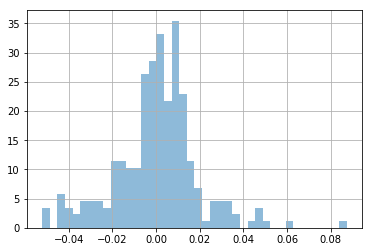

In [141]:
from scipy.stats import norm 
import matplotlib.mlab as mlab
mean_portfolio = np.mean(df1.values.tolist()[1:])
std_portfolio = np.std(df1.values.tolist()[1:])
df['returns'].hist(bins = 40, normed = True, histtype = 'stepfilled', alpha = 0.5)

In [142]:
# ! pip install tabulate
from tabulate import tabulate
VaR_90 = norm.ppf(1-0.9, mean_portfolio, std_portfolio)
VaR_95 = norm.ppf(1-0.95, mean_portfolio,std_portfolio)
VaR_99 = norm.ppf(1-0.99, mean_portfolio, std_portfolio)

print(tabulate([['90%',VaR_90],['95%',VaR_95],['99%',VaR_99]], headers = ['Confidence Level','Value at Risk']))


Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.024038
95%                      -0.0310008
99%                      -0.0440619


In [143]:
## portfolio Parametric VaR 
# calculate the weight
weight_list = list(df.iloc[0][:-1])
w = np.zeros(len(weight_list)-1)
for i in range(len(weight_list)-1):
    w[i] = weight_list[i]/weight_list[-1]
w


array([0.06662575, 0.60912643, 0.0116865 , 0.06266423, 0.00474896,
       0.05734411, 0.03610587, 0.01278071, 0.11908788, 0.01982955])

In [144]:
# Compute variance-covariance matrix
covmat = np.cov(portfolio.pct_change()['Adj Close'].dropna())
covmat


array([[ 1.14028315e-03,  7.44914178e-04, -4.79967972e-04, ...,
         1.22971500e-04, -6.31587124e-05,  3.88162420e-05],
       [ 7.44914178e-04,  8.91361548e-04, -1.93905980e-04, ...,
         1.76610325e-04,  5.05658990e-05, -4.19021056e-05],
       [-4.79967972e-04, -1.93905980e-04,  2.67751828e-04, ...,
        -2.09944606e-05,  6.16963651e-05, -3.36433888e-06],
       ...,
       [ 1.22971500e-04,  1.76610325e-04, -2.09944606e-05, ...,
         1.56887063e-04,  2.06979255e-05, -2.27569975e-05],
       [-6.31587124e-05,  5.05658990e-05,  6.16963651e-05, ...,
         2.06979255e-05,  7.78813220e-05, -3.81953694e-05],
       [ 3.88162420e-05, -4.19021056e-05, -3.36433888e-06, ...,
        -2.27569975e-05, -3.81953694e-05,  1.29469536e-04]])

In [145]:
df.sort_values('returns',inplace = True, ascending = True)
VaR_90 = df['returns'].quantile(0.1)
VaR_95 = df['returns'].quantile(0.05)
VaR_99 = df['returns'].quantile(0.01)

print(tabulate([['90%',VaR_90],['95%',VaR_95],['99%',VaR_99]], headers = ['Confidence Level','Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0237969
95%                      -0.0343944
99%                      -0.0469407


/Users/guapofish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
